In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import matplotlib as mpl
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path_S1 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_S2 = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 2/'

NS1 = read_SMPS(path_S1, parent_path, [-1, 0])
OPS1 = read_OPS(path_S1+'OPS/', parent_path, -1)
NS2 = read_SMPS(path_S2, parent_path, [-1, 0])
OPS2 = read_OPS(path_S2+'OPS/', parent_path, -1)

NS_dict_keys = ['2024-12-09_NanoScan', '2024-12-10_NanoScan', '2024-12-11_NanoScan', '2024-12-12_NanoScan', 
                '2024-12-13_NanoScan', '2024-12-16_NanoScan', '2024-12-17_NanoScan']
NS_bins = NS1['2024-12-06_NanoScan'].keys()[3:16].to_list()

OPS1_dict_keys = ['OPS1-CPH-d1', 'OPS1-CPH-d2', 'OPS1-CPH-d3', 'OPS1-CPH-d4', 'OPS1-CPH-d5', 'OPS1-NP-d1', 'OPS1-NP-d2'] # 'OPS1-CPH-n3', 'OPS1-CPH-n4'
OPS2_dict_keys = ['OPS2-CPH-d1', 'OPS2-CPH-d2', 'OPS2-CPH-d3', 'OPS2-CPH-d4', 'OPS2-CPH-d5', 'OPS2-NP-d1', 'OPS2-NP-d2']
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_keys = OPS1['OPS1-HEPA'].keys()[1:17].to_list()

OPS1['OPS1-CPH-d5'] = pd.concat([OPS1['OPS1-CPH-d5-1'], OPS1['OPS1-CPH-d5-2']], ignore_index=True)
OPS1['OPS1-NP-d2'] = pd.concat([OPS1['OPS1-NP-d2-1'], OPS1['OPS1-NP-d2-2']], ignore_index=True)
OPS2['OPS2-CPH-d3'] = pd.concat([OPS2['OPS2-CPH-d3-1'], OPS2['OPS2-CPH-d3-2']], ignore_index=True)
OPS2['OPS2-CPH-d3'] = pd.concat([OPS2['OPS2-CPH-d3'], OPS2['OPS2-CPH-d3-3']], ignore_index=True)

NS1_bg_mean, NS1_bg_std, NS1_bg_error = bin_mean(['2024-12-06 11:05:00', '2024-12-06 11:45:00'], 
                                              NS1['2024-12-06_NanoScan'], NS_bins, 'Time', 0.1)
for key in NS_dict_keys:
    df = NS1[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS1_bg_mean[i]
    NS1[key] = df

NS2_bg_mean, NS2_bg_std, NS2_bg_error = bin_mean(['2024-12-06 11:05:00', '2024-12-06 11:45:00'], 
                                              NS2['2024-12-06_NanoScan'], NS_bins, 'Time', 0.1)
for key in NS_dict_keys:
    df = NS2[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS2_bg_mean[i]
    NS2[key] = df

OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]

OPS1_mass = {}
for key in OPS1_dict_keys:
    mass_conc = calc_mass_conc(OPS1[key], OPS_keys, OPS_mid_point, 1.2)
    OPS1_mass[key] = mass_conc

OPS2_mass = {}
for key in OPS2_dict_keys:
    mass_conc = calc_mass_conc(OPS2[key], OPS_keys, OPS_mid_point, 1.2)
    OPS2_mass[key] = mass_conc

NS_bin_mean = []
for key in NS_bins:
    NS_bin_mean.append(float(key) / 1000)

NS1_mass = {}
NS2_mass = {}
for key in NS_dict_keys:
    mass_conc1 = calc_mass_conc(NS1[key], NS_bins, NS_bin_mean, 1.2)
    NS1_mass[key] = mass_conc1
    mass_conc2 = calc_mass_conc(NS2[key], NS_bins, NS_bin_mean, 1.2)
    NS2_mass[key] = mass_conc2

In [3]:
timestamps = [['2024-12-09 12:00:00', '2024-12-09 16:30:00'],
              ['2024-12-10 09:15:00', '2024-12-10 16:00:00'],
              ['2024-12-11 09:00:00', '2024-12-11 16:00:00'],
              ['2024-12-12 09:00:00', '2024-12-12 16:00:00'],
              ['2024-12-13 08:45:00', '2024-12-13 14:00:00'],
              ['2024-12-16 09:45:00', '2024-12-16 15:45:00'],
              ['2024-12-17 09:15:00', '2024-12-17 15:45:00']]

C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\335860445.py:18: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()
C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\335860445.py:18: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()
C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\335860445.py:30: UserWarning: The figure layout has changed to tight
  fig2.tight_layout()
C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\335860445.py:42: UserWarning: The figure layout has changed to tight
  fig3.tight_layout()


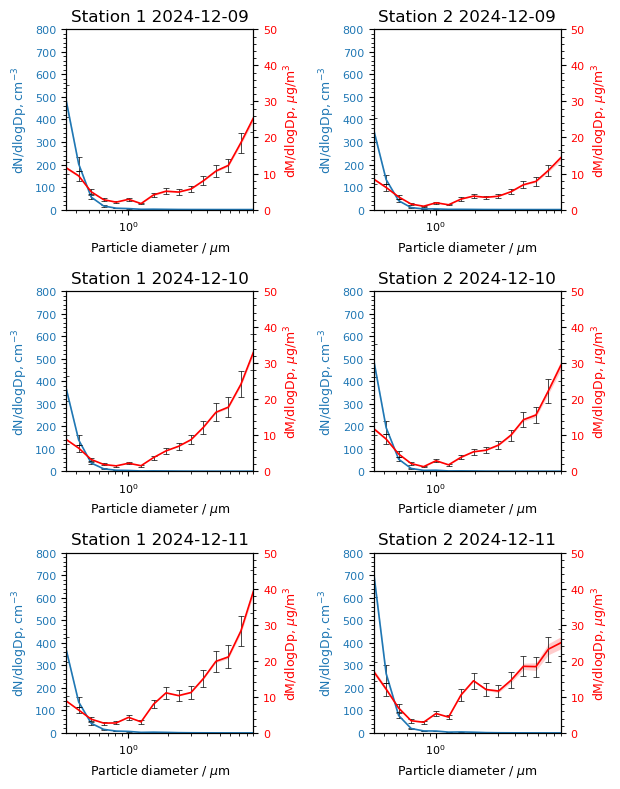

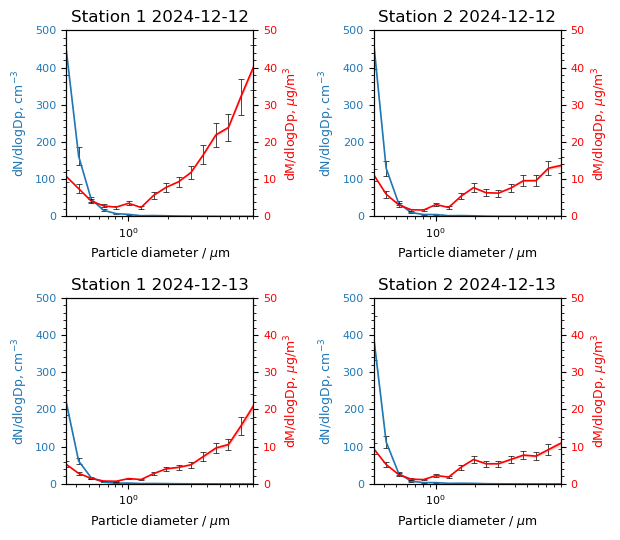

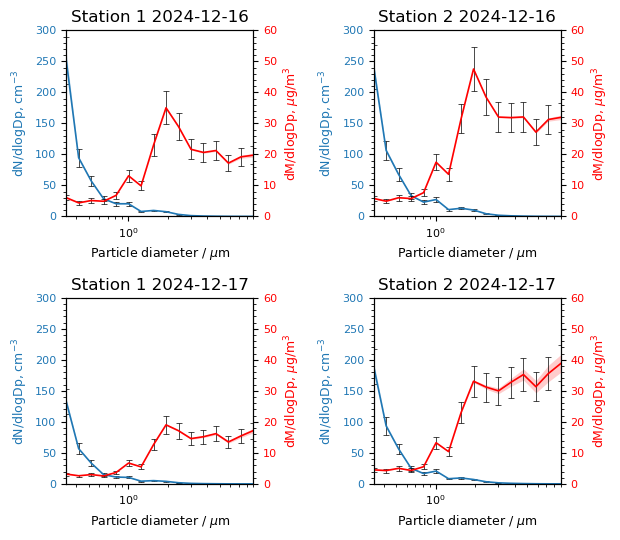

In [12]:
fig1, ax1 = plt.subplots(3, 2, figsize = (6.3, 8))
fig2, ax2 = plt.subplots(2, 2, figsize = (6.3, 5.5))
fig3, ax3 = plt.subplots(2, 2, figsize = (6.3, 5.5))

for i, key in enumerate(OPS1_dict_keys):
    date = timestamps[i][0].split(' ')[0]
    key_s2 = OPS2_dict_keys[i]

    if i < 3:
        n, en, m, em, ax_1, ax2_1 = plot_bin_mean(ax1[i][0], timestamps[i], OPS1[key], OPS1_mass[key], OPS_keys, 'Time', OPS_mid_point, OPS_cut_point, 0.15, None, True)
        n, en, m, em, ax_2, ax2_2 = plot_bin_mean(ax1[i][1], timestamps[i], OPS2[key_s2], OPS2_mass[key_s2], OPS_keys, 'Time', OPS_mid_point, OPS_cut_point, 0.15, None, True)

        ax_1.set(title = 'Station 1 ' + date, ylim = (0, 800))
        ax_2.set(title = 'Station 2 ' + date, ylim = (0, 800))
        ax2_1.set_ylim(0, 50)
        ax2_2.set_ylim(0, 50)

        fig1.tight_layout()
        fig1.savefig('Mean_concentrations/OPS_mean_CPH_hall.png', dpi = 600)

    if 2 < i < 5:
        n, en, m, em, ax_1, ax2_1 = plot_bin_mean(ax2[i-3][0], timestamps[i], OPS1[key], OPS1_mass[key], OPS_keys, 'Time', OPS_mid_point, OPS_cut_point, 0.15, None, True)
        n, en, m, em, ax_2, ax2_2 = plot_bin_mean(ax2[i-3][1], timestamps[i], OPS2[key_s2], OPS2_mass[key_s2], OPS_keys, 'Time', OPS_mid_point, OPS_cut_point, 0.15, None, True)

        ax_1.set(title = 'Station 1 ' + date, ylim = (0, 500))
        ax_2.set(title = 'Station 2 ' + date, ylim = (0, 500))
        ax2_1.set_ylim(0, 50)
        ax2_2.set_ylim(0, 50)

        fig2.tight_layout()
        fig2.savefig('Mean_concentrations/OPS_mean_CPH_platform.png', dpi = 600)

    if i > 4:
        n, en, m, em, ax_1, ax2_1 = plot_bin_mean(ax3[i-5][0], timestamps[i], OPS1[key], OPS1_mass[key], OPS_keys, 'Time', OPS_mid_point, OPS_cut_point, 0.15, None, True)
        n, en, m, em, ax_2, ax2_2 = plot_bin_mean(ax3[i-5][1], timestamps[i], OPS2[key_s2], OPS2_mass[key_s2], OPS_keys, 'Time', OPS_mid_point, OPS_cut_point, 0.15, None, True)

        ax_1.set(title = 'Station 1 ' + date, ylim = (0, 300))
        ax_2.set(title = 'Station 2 ' + date, ylim = (0, 300))
        ax2_1.set_ylim(0, 60)
        ax2_2.set_ylim(0, 60)

        fig3.tight_layout()
        fig3.savefig('Mean_concentrations/OPS_mean_NP.png', dpi = 600)

C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\2305391089.py:19: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()
C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\2305391089.py:19: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()
C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\2305391089.py:31: UserWarning: The figure layout has changed to tight
  fig2.tight_layout()
C:\Users\B363580\AppData\Local\Temp\ipykernel_14544\2305391089.py:43: UserWarning: The figure layout has changed to tight
  fig3.tight_layout()


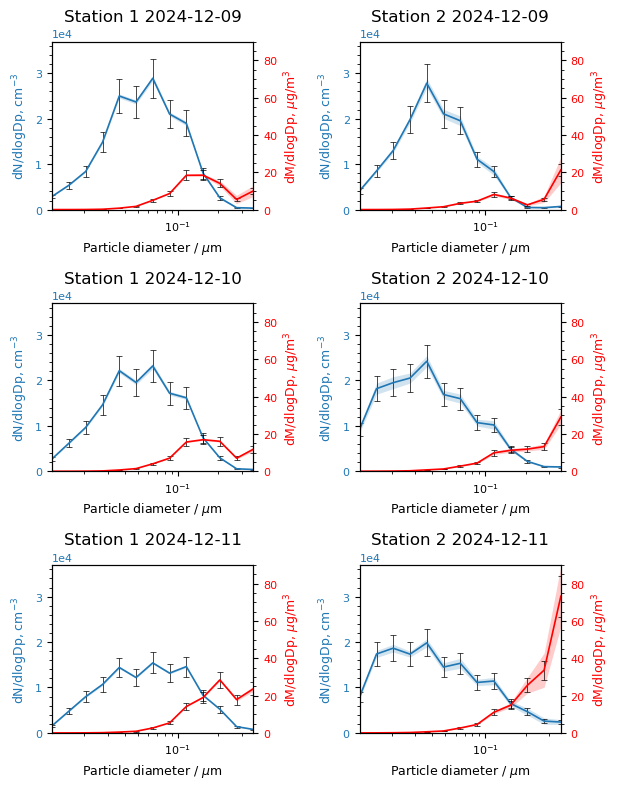

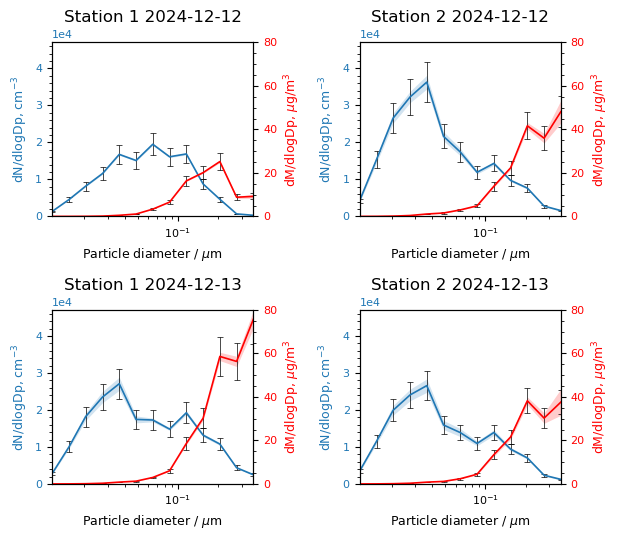

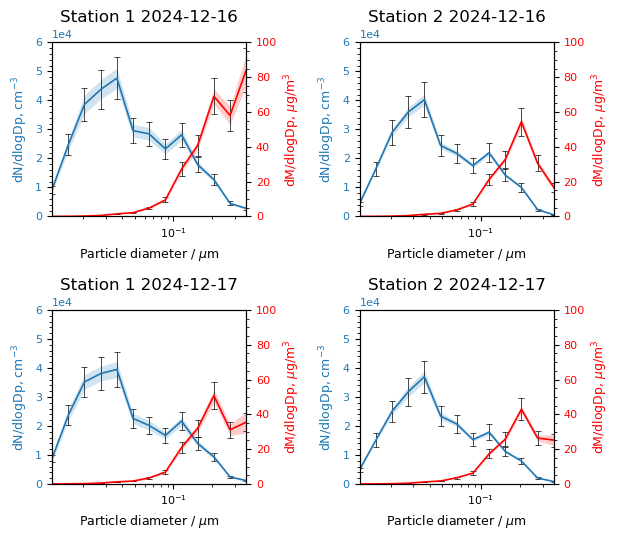

In [18]:
NS_cut_point = bin_edges(0.010, NS_bin_mean)

fig1, ax1 = plt.subplots(3, 2, figsize = (6.3, 8))
fig2, ax2 = plt.subplots(2, 2, figsize = (6.3, 5.5))
fig3, ax3 = plt.subplots(2, 2, figsize = (6.3, 5.5))

for i, key in enumerate(NS_dict_keys):
    date = timestamps[i][0].split(' ')[0]

    if i < 3:
        n, en, m, em, ax_1, ax2_1 = plot_bin_mean(ax1[i][0], timestamps[i], NS1[key], NS1_mass[key], NS_bins, 'Time', NS_bin_mean, NS_cut_point, 0.15, None, True)
        n, en, m, em, ax_2, ax2_2 = plot_bin_mean(ax1[i][1], timestamps[i], NS2[key], NS2_mass[key], NS_bins, 'Time', NS_bin_mean, NS_cut_point, 0.15, None, True)

        ax_1.set(title = 'Station 1 ' + date, ylim = (0, 3.7*10**4))
        ax_2.set(title = 'Station 2 ' + date, ylim = (0, 3.7*10**4))
        ax2_1.set_ylim(0, 90)
        ax2_2.set_ylim(0, 90)

        fig1.tight_layout()
        fig1.savefig('Mean_concentrations/NS_mean_CPH_hall.png', dpi = 600)

    if 2 < i < 5:
        n, en, m, em, ax_1, ax2_1 = plot_bin_mean(ax2[i-3][0], timestamps[i], NS1[key], NS1_mass[key], NS_bins, 'Time', NS_bin_mean, NS_cut_point, 0.15, None, True)
        n, en, m, em, ax_2, ax2_2 = plot_bin_mean(ax2[i-3][1], timestamps[i], NS2[key], NS2_mass[key], NS_bins, 'Time', NS_bin_mean, NS_cut_point, 0.15, None, True)

        ax_1.set(title = 'Station 1 ' + date, ylim = (0, 4.7*10**4))
        ax_2.set(title = 'Station 2 ' + date, ylim = (0, 4.7*10**4))
        ax2_1.set_ylim(0, 80)
        ax2_2.set_ylim(0, 80)

        fig2.tight_layout()
        fig2.savefig('Mean_concentrations/NS_mean_CPH_platform.png', dpi = 600)

    if i > 4:
        n, en, m, em, ax_1, ax2_1 = plot_bin_mean(ax3[i-5][0], timestamps[i], NS1[key], NS1_mass[key], NS_bins, 'Time', NS_bin_mean, NS_cut_point, 0.15, None, True)
        n, en, m, em, ax_2, ax2_2 = plot_bin_mean(ax3[i-5][1], timestamps[i], NS2[key], NS2_mass[key], NS_bins, 'Time', NS_bin_mean, NS_cut_point, 0.15, None, True)

        ax_1.set(title = 'Station 1 ' + date, ylim = (0, 6*10**4))
        ax_2.set(title = 'Station 2 ' + date, ylim = (0, 6*10**4))
        ax2_1.set_ylim(0, 100)
        ax2_2.set_ylim(0, 100)

        fig3.tight_layout()
        fig3.savefig('Mean_concentrations/NS_mean_NP.png', dpi = 600)